# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

In [167]:
# import all modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob

We use `glob` to combine all csv files into one main dataframe

In [168]:
states = glob('states*.csv')

df_list = []

for state in states:
    data = pd.read_csv(state)
    df_list.append(data)
    
df = pd.concat(df_list)

## Inspect data

In [169]:
df.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


In [170]:
df.shape

(60, 11)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 5
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  60 non-null     int64 
 1   State       60 non-null     object
 2   TotalPop    60 non-null     int64 
 3   Hispanic    60 non-null     object
 4   White       60 non-null     object
 5   Black       60 non-null     object
 6   Native      60 non-null     object
 7   Asian       60 non-null     object
 8   Pacific     55 non-null     object
 9   Income      60 non-null     object
 10  GenderPop   60 non-null     object
dtypes: int64(2), object(9)
memory usage: 5.6+ KB


In [172]:
df.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [173]:
df.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

## Cleaning data

In [174]:
# duplicates
# some information is repeated and must be removed
df[df.duplicated(subset=['State'])]

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,"$64,657.80",2648667M_2630239F
0,0,Georgia,10006693,8.42%,54.29%,32.09%,0.19%,3.10%,0.05%,"$50,811.08",4883331M_5123362F
0,0,Iowa,3093526,5.30%,87.72%,3.26%,0.29%,1.70%,0.06%,"$53,017.75",1534595M_1558931F
0,0,Maryland,5930538,8.47%,52.68%,30.68%,0.20%,5.33%,0.04%,"$78,765.40",2872643M_F
0,0,Missouri,6045448,4.04%,77.51%,14.12%,0.36%,1.62%,0.10%,"$49,763.99",2964003M_3081445F
0,0,New Jersey,8904413,18.75%,56.49%,14.39%,0.12%,8.16%,0.03%,"$76,581.08",4343027M_4561386F
0,0,Ohio,11575977,3.67%,75.90%,16.21%,0.17%,1.62%,0.02%,"$49,655.25",5662893M_5913084F
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,"$59,125.27",510388M_543273F
0,0,Utah,2903379,13.47%,79.41%,1.02%,1.08%,2.20%,0.83%,"$63,488.92",1459229M_1444150F


In [175]:
# dropping duplicates
df = df.drop_duplicates(subset=['State'])

In [176]:
# District of Columbia is not a state and should be removed
df = df[df['State'] != 'District of Columbia']

In [177]:
# income
# converting income to a float and removing the $ sign
df.Income = pd.to_numeric(df.Income.replace('[\$,]+', '', regex=True))

In [178]:
# spliting genderPop into male and female
gender_split = df.GenderPop.str.split('_', expand=True)
df['Male'] = gender_split.get(0)
df['Female'] = gender_split.get(1)

In [179]:
# coverting values to numeric
df['Male'] = pd.to_numeric(df.Male.replace('(M)', '', regex=True))
df['Female'] = pd.to_numeric(df.Female.replace('(F)', '', regex=True))

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 5
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     int64  
 1   State       50 non-null     object 
 2   TotalPop    50 non-null     int64  
 3   Hispanic    50 non-null     object 
 4   White       50 non-null     object 
 5   Black       50 non-null     object 
 6   Native      50 non-null     object 
 7   Asian       50 non-null     object 
 8   Pacific     46 non-null     object 
 9   Income      50 non-null     float64
 10  GenderPop   50 non-null     object 
 11  Male        50 non-null     int64  
 12  Female      48 non-null     float64
dtypes: float64(2), int64(3), object(8)
memory usage: 5.5+ KB


we can conclude that some data in the female pacific columns are missing  \
to fix the female column, you subtract men population from total population using `fillna()` 

In [181]:
df.Female.fillna(df.TotalPop - df.Male, inplace=True)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 5
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     int64  
 1   State       50 non-null     object 
 2   TotalPop    50 non-null     int64  
 3   Hispanic    50 non-null     object 
 4   White       50 non-null     object 
 5   Black       50 non-null     object 
 6   Native      50 non-null     object 
 7   Asian       50 non-null     object 
 8   Pacific     46 non-null     object 
 9   Income      50 non-null     float64
 10  GenderPop   50 non-null     object 
 11  Male        50 non-null     int64  
 12  Female      50 non-null     float64
dtypes: float64(2), int64(3), object(8)
memory usage: 5.5+ KB


In [183]:
df = df[['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Income', 'Male', 'Female']]

In [184]:
df.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093,2489527.0
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160,349215.0
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088,3342840.0
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913,1506295.0
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135,19334329.0


## Plot data

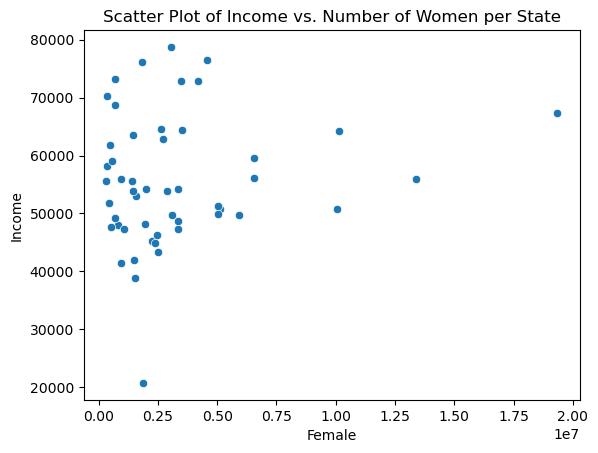

<Figure size 640x480 with 0 Axes>

In [185]:
# scatter plot income x female
sns.scatterplot(x=df.Female, y=df.Income)
plt.title("Scatter Plot of Income vs. Number of Women per State")
plt.show()
plt.clf()

### Preparing data for histogram

In [211]:
# changing all values to floats
races = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

for race in races:
    df[race] = pd.to_numeric(df[race].str.replace('%', ''))

In [216]:
# filling in Pacific data
df.Pacific.fillna(100.0 - df.Hispanic - df.White - df.Black - df.Native - df.Asian, inplace=True)

In [218]:
df.info()
## our data is now fully cleaned

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 5
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   TotalPop  50 non-null     int64  
 2   Hispanic  50 non-null     float64
 3   White     50 non-null     float64
 4   Black     50 non-null     float64
 5   Native    50 non-null     float64
 6   Asian     50 non-null     float64
 7   Pacific   50 non-null     float64
 8   Income    50 non-null     float64
 9   Male      50 non-null     int64  
 10  Female    50 non-null     float64
dtypes: float64(8), int64(2), object(1)
memory usage: 4.7+ KB
